## Simple forward pass

In this notebook you will do a simple forward pass for a neural network with and without hidden layers. You will use the sigmoid function to calculate the probability if a banknote is fake or not.

**Dataset:** You work with a banknote data set and classification task. We have 2 features.

* x1: skewness of wavelet transformed image  
* x2: entropy of wavelet transformed image  

Don't bother too much how these features exactely came from.

**The goal is to classify each banknote to either "real" (Y=0) or "fake" (Y=1).**


**Content:**
* calculate the forward pass of the neural network without hidden layer by hand, with matrix multiplication and keras
* visualize the learned decision boundary in a 2D plot
* calculate the forward pass of the neural network with one hidden layer (8 nodes) with matrix multiplication and keras
* visualize the learned decision boundary in a 2D plot
* compare the decision boundaries of the two models

#### Imports

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras import optimizers

In [2]:
# definition of the sigmoid function
def sigmoid(x):
    return (1 / (1 + np.exp(-x)))

In [3]:
# we just assume x1 and x2
x1 = 1
x2 = 2.2

In [4]:
# we just assume w1 and w2 and b1
w1 = 0.3
w2 = 0.1
b  = 1 

### Forwad pass by hand

In [5]:
(x1*w1+x2*w2)+b ## output before the activation

1.52

In [6]:
sigmoid((x1*w1+x2*w2)+b) ## output after the sigmoid activation
                         ## probability for the banknote to be fake

0.8205384805926733

### Forwad pass with matrix multiplication

In [7]:
X=np.array([[x1,x2]])

In [8]:
W=np.array([[w1],[w2]])

In [9]:
print(X.shape)
print(W.shape)

(1, 2)
(2, 1)


In [10]:
np.matmul(X,W)+b  ## output before the activation

array([[1.52]])

In [11]:
sigmoid(np.matmul(X,W)+b) ## output after the sigmoid activation
                          ## probability for the banknote to be fake

array([[0.82053848]])

In [12]:
## funtion to return the probaiblity output after the matrix multiplication
def predict_no_hidden(X):
    return sigmoid(np.matmul(X,W)+b)

In [13]:
### funtion to plot the decision boundary 
def plotModel(predict, t):
    # define a grid for the 2D feature space
    # predict at each grid point the probability for class 1

    x1list = np.linspace(-10, 10, 10) # Define 100 points on the x-axis
    x2list = np.linspace(-10, 10, 10) # Define 100 points on the x-axis
    X1_grid, X2_grid = np.meshgrid(x1list, x2list)

    # model.predict for respective value x1 and x2 
    p = np.array([predict(np.reshape(np.array([l1,l2]),(1,2))) for l1,l2 in zip(np.ravel(X1_grid), np.ravel(X2_grid))])
    print(p.shape)
    if len(p.shape) == 3 and p.shape[2]==2:
        p = p[:,:,1] # pick p for class 1 if there are more than 2 classes
    p = np.reshape(p,X1_grid.shape)

    # visualize the predicted probabilities in the 2D feature space
    # once without and once with the data points used for fitting
    plt.figure(figsize=(16,4))
    plt.subplot(1,2,(1))
    cp = plt.contourf(X1_grid, X2_grid, p,cmap='RdBu_r')
    plt.colorbar(cp)
    plt.title(t)
    plt.xlabel('x1')
    plt.ylabel('x2')

#### Exercise 
Play around with the values for x1 and x2 and check if the position at the decision boundary
matches the predicted probability
How does the decision boundary look? 


(100, 1, 1)


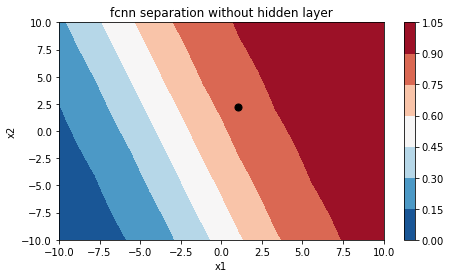

In [14]:
plotModel(predict_no_hidden, t='fcnn separation without hidden layer')
plt.scatter(x1,x2,c="black",s=50)

### Forwad pass with hidden layer (matrix multiplication)

In [15]:
# we use the same values for x1 and x2 and random normal values for the weights
X=np.array([[x1,x2]])
np.random.seed(22)
W1=np.reshape((np.random.normal(0,1,16)),(2,8))
np.random.seed(22)
b1=np.reshape((np.random.normal(0,1,8)),(8,))
np.random.seed(22)
W2=np.reshape((np.random.normal(0,1,8)),(8,1))
np.random.seed(22)
b2=np.reshape((np.random.normal(0,1,1)),(1,))

In [16]:
print(X.shape)
print(W1.shape)
print(b1.shape)
print(W2.shape)
print(b2.shape)

(1, 2)
(2, 8)
(8,)
(8, 1)
(1,)


In [17]:
hidden=sigmoid(np.matmul(X,W1)+b1)
hidden

array([[0.76752454, 0.01533699, 0.90265373, 0.27163597, 0.57707969,
        0.41351693, 0.37964327, 0.52893641]])

In [18]:
p_out=sigmoid(np.matmul(hidden,W2)+b2)
p_out

array([[0.44860787]])

In [19]:
## funtion to return the probaiblity output after the hidden layer 
def predict_hidden(X):
    hidden=sigmoid(np.matmul(X,W1)+b1)
    return(sigmoid(np.matmul(hidden,W2)+b2))

In [20]:
X,predict_hidden(X)

(array([[1. , 2.2]]), array([[0.44860787]]))

(100, 1, 1)


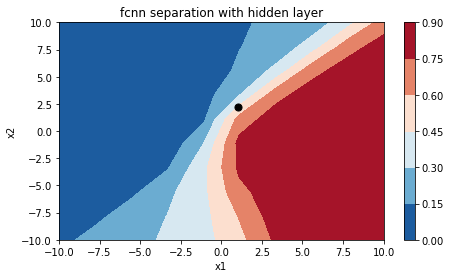

In [21]:
plotModel(predict_hidden, t='fcnn separation with hidden layer')
plt.scatter(x1,x2,c="black",s=50)

#### Exercise 
Play around with the values for x1 and x2 and check if the position at the decision boundary
matches the predicted probability
How does the decision boundary look? 

# Keras 

**Look at this part after the introduction of Keras.**


We now do the same as above using Keras.

### Forwad pass in keras

In [22]:
model = Sequential()                                        # starts the definition of the network
model.add(Dense(1, batch_input_shape=(None, 2),             # adds a new layer to the network with a single neuron  
                activation='sigmoid'))                      # The input is a tensor of size (batch_size, 2), 
                                                            # since we don’t specify the Batch Size now, we use None as a placeholder
                                                            # chooses the activation function ‘sigmoid’

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.set_weights([W,np.array([b])])                        ## set the weights of the model to w1 w2 and b

(100, 1, 1)


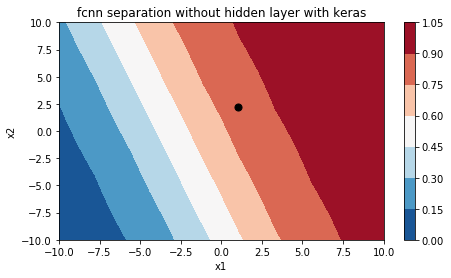

In [24]:
# Plotting the decision boundary
plotModel(model.predict, 'fcnn separation without hidden layer with keras') 
plt.scatter(X[0][0],X[0][1],c="black",s=50)

### Forwad pass with hidden layer (keras)

In [25]:
model = Sequential()                                        
model.add(Dense(8, batch_input_shape=(None, 2),activation='sigmoid'))                      
model.add(Dense(1, activation='sigmoid'))                      
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 24        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.set_weights([W1,b1,W2,b2]) ## set the weights of the model to W1, b1, W2 and b2

(100, 1, 1)


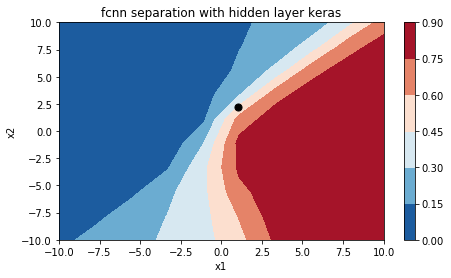

In [27]:
# Plotting the decision boundary

plotModel(model.predict, 'fcnn separation with hidden layer keras') 
plt.scatter(X[0][0],X[0][1],c="black",s=50)
#plt.vlines(X[0][0],-10,10)
#plt.hlines(X[0][1],-10,10)